In [9]:
#imports
import pandas as pd
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
#innitiate coded tsv files
# Define the list of desired numbers
use_all_numbers = True
desired_numbers = [2, 3, 4, 10, 11, 16, 17, 18]

# Get a list of all .tsv files in the data folder
tsv_files = glob.glob('data/*.tsv')
# Filter files based on the flag
if use_all_numbers:
    filtered_files = tsv_files
else:
    filtered_files = [file for file in tsv_files if any(f'play{num}coded.tsv' in file for num in desired_numbers)]


# Read each file into a DataFrame and store in a list
dataframes = [pd.read_csv(file, delimiter='\t') for file in filtered_files]

# Optionally, you can concatenate all DataFrames into a single DataFrame
all_data = pd.concat(dataframes, ignore_index=True)

In [11]:
# Preprocess data
# Drop labels
X = all_data.drop(columns=['Score'])

# Drop other values
X = X.drop(columns=['SequenceID', 'TimeStamp', 'First30SecondsCoinsCollected', 'First30SecondsAsteroidHits'])

# Separate target variable
y = all_data['Score']
X = X.fillna(method='ffill')

#add weights 


C:\Users\svanl\AppData\Local\Temp\ipykernel_15984\3784440122.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


In [12]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
# weights = y_train.apply(lambda score: 0.5 if -10 <= score <= 10 else 1.0)  # Less weight for neutral scores, higher for others

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 316.70501115423986
Mean Absolute Error: 11.674304973629466
R2 Score: 0.250044647859311


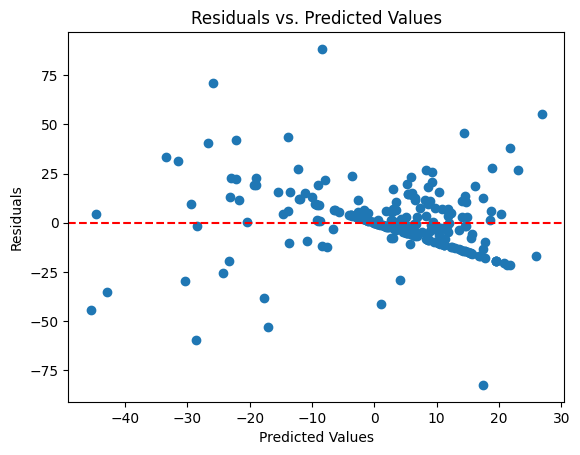

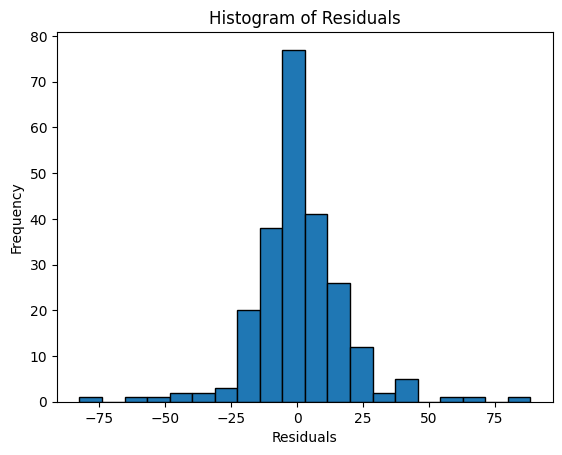

Mean Absolute Percentage Error (MAPE): inf%
Adjusted R² Score: 0.122


In [16]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Calculate MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

r2 = model.score(X_test, y_test)
adjusted_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])
print(f'Adjusted R² Score: {adjusted_r2:.3f}')




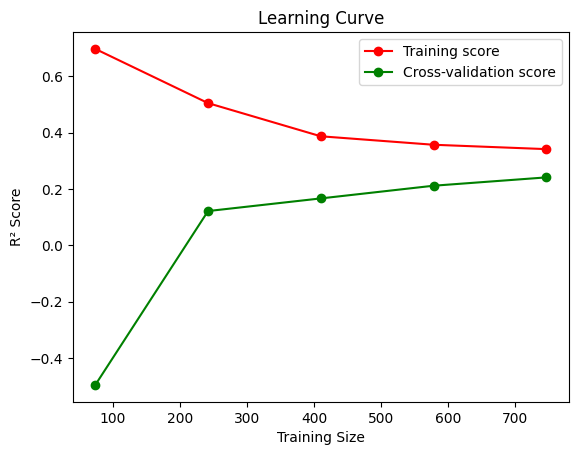

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='r2')

# Plot learning curve
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()


Cross-Validation Mean Absolute Error: 11.684
Cross-Validation Mean Squared Error: 329.671


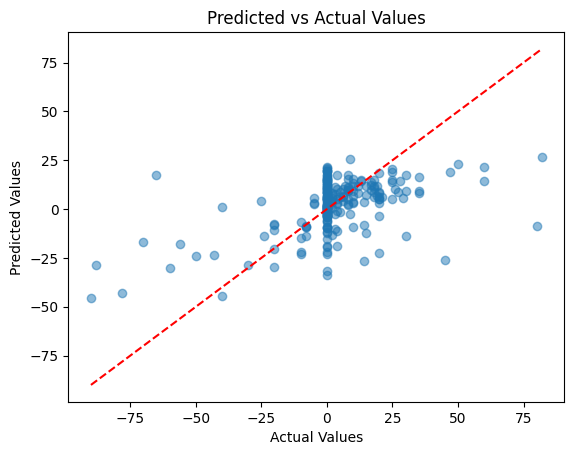

In [19]:
from sklearn.model_selection import cross_val_score

# Mean Absolute Error Cross Validation
cv_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-Validation Mean Absolute Error: {-np.mean(cv_mae):.3f}')

# Mean Squared Error Cross Validation
cv_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Mean Squared Error: {-np.mean(cv_mse):.3f}')

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()





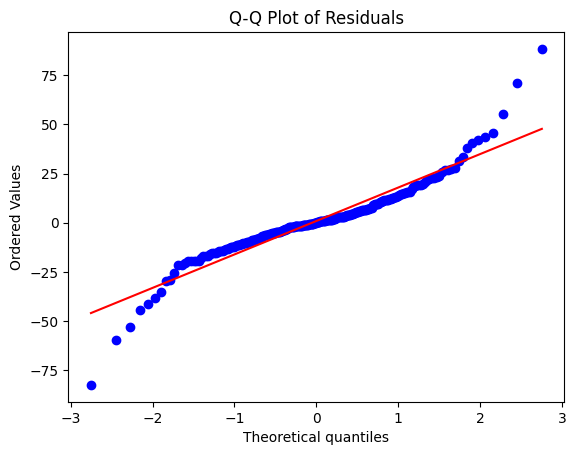

In [22]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [24]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create SVR model with RBF kernel
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.1))
svr_model.fit(X_train, y_train)

# Predict on test set
y_pred_svr = svr_model.predict(X_test)


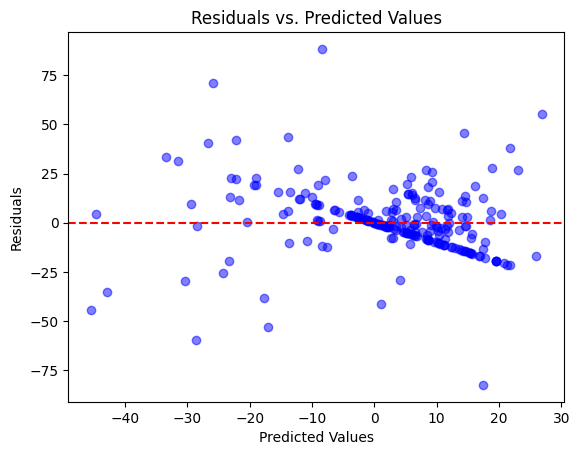

In [26]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


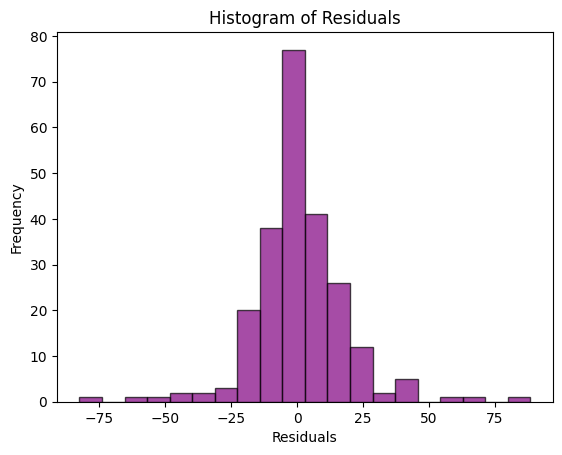

In [28]:
# Plot histogram of residuals
plt.hist(residuals, bins=20, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
